In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from data_loaders.mimic import _load_mimic_los

In [2]:
def generate_data(y, r, n):
    idx = np.random.choice(len(y), size=n, p=(r / r.sum()).flatten())
    y_new = y[idx]
    return y_new

In [3]:
_, y_target, r_density, _, _, _, _ = _load_mimic_los("mimic_los-density")
_, y_target, r_recip_density_sq, _, _, _, _ = _load_mimic_los("mimic_los-recip-density-sq")

y_density = generate_data(y_target, r_density, n=len(y_target))
y_recip_density_sq = generate_data(y_target, r_recip_density_sq, n=len(y_target))

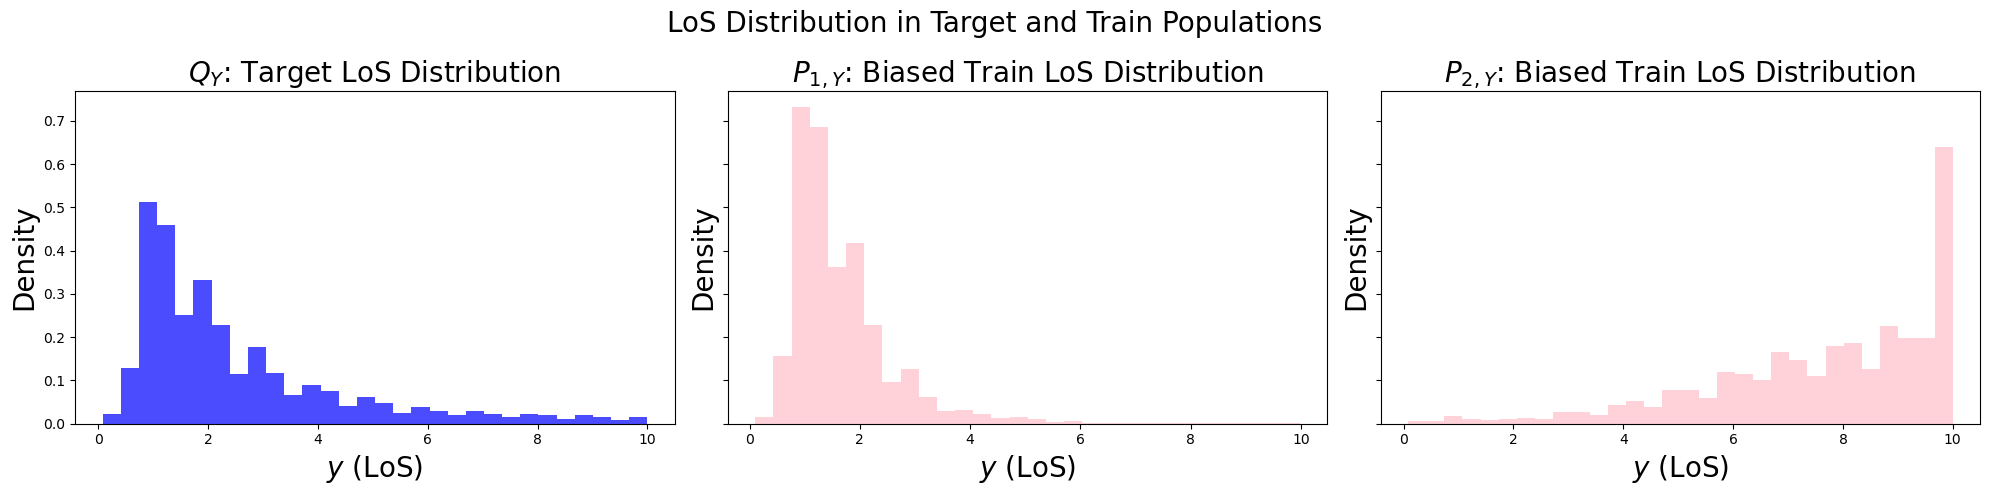

In [4]:
# Create subplots
fig, axes = plt.subplots(1,3, figsize=(20, 5), sharey=True)
fontsize=20

# Plot histogram for Q
axes[0].hist(y_target, bins=30, color='blue', alpha=0.7, density=True)
axes[0].set_title(r"$Q_{Y}$" + ": Target LoS Distribution", fontsize=fontsize)
axes[0].set_xlabel(r"$y$" + ' (LoS)', fontsize=fontsize)
axes[0].set_ylabel('Density', fontsize=fontsize)

# Plot histogram for P1
axes[1].hist(y_density, bins=30, color='pink', alpha=0.7, density=True)
axes[1].set_title(r"$P_{1,Y}$" + ": Biased Train LoS Distribution", fontsize=fontsize)
axes[1].set_xlabel(r"$y$" + ' (LoS)', fontsize=fontsize)
axes[1].set_ylabel('Density', fontsize=fontsize)

# Plot histogram for P2
axes[2].hist(y_recip_density_sq, bins=30, color='pink', alpha=0.7, density=True)
axes[2].set_title(r"$P_{2, Y}$" + ": Biased Train LoS Distribution", fontsize=fontsize)
axes[2].set_xlabel(r"$y$" + ' (LoS)', fontsize=fontsize)
axes[2].set_ylabel('Density', fontsize=fontsize)

plt.suptitle("LoS Distribution in Target and Train Populations", fontsize=fontsize)

plt.tight_layout()
plt.savefig("figs/mimic_los_dist.pdf")
plt.show()